# .raw file tests

In [1]:
# Check the configuration
import numpy as np
from matplotlib import pyplot as plt
from cosmic.fengines import ant_remotefeng_map # Map antenna numbers to FPGA cards
from cosmic.hashpipe_aux import redis_obj # Redis interface

fengs = ant_remotefeng_map.get_antennaFengineDict(redis_obj, antname_filter=['ea08'])
feng08 = fengs['ea08']
fengs = ant_remotefeng_map.get_antennaFengineDict(redis_obj, antname_filter=['ea12'])
feng12 = fengs['ea12']
feng08.fpga.print_status()
feng12.fpga.print_status()
print(feng08.pipeline_id)
print(feng12.pipeline_id)

 - fw_build_time: 2022-08-03T18:56:20
 - fw_type: 2
 - fw_version: 13.4.0.0
 - host: cosmic-fpga-0:pcie65
 - programmed: True
 - sw_version: 0.0.1
 - sys_mon: not reporting
 - timestamp: 2022-08-18T19:56:52.781968
 - fw_build_time: 2022-08-03T18:56:20
 - fw_type: 2
 - fw_version: 13.4.0.0
 - host: cosmic-fpga-1:pcie3e
 - programmed: True
 - sw_version: 0.0.1
 - sys_mon: not reporting
 - timestamp: 2022-08-18T19:56:52.844879
1
1


In [19]:
fpgfile = "/home/jackh/adm_pcie_9h7_dts_dual_4x100g_dts_test_2022-08-23_1034.fpg"

In [20]:
feng08.program(fpgfile)
feng12.program(fpgfile)

Loading firmware /tmp/2022-08-23_13h40m09_adm_pcie_9h7_dts_dual_4x100g_dts_test_2022-08-23_1034.fpg to pcie65
FPGA is programmed with firmware type 99
Can't initialize firmware control blocks because firmware version 99 is not known. Using minimal control set.
Loading firmware /tmp/2022-08-23_13h40m10_adm_pcie_9h7_dts_dual_4x100g_dts_test_2022-08-23_1034.fpg to pcie3e
FPGA is programmed with firmware type 99
Can't initialize firmware control blocks because firmware version 99 is not known. Using minimal control set.


In [21]:
feng08.dts.initialize()

pipeline1_dts - Lock state: 0xfff
pipeline1_dts - Setting lane map to [0, 1, 3, 2, 8, 9, 11, 10, 4, 5, 7, 6]
pipeline1_dts - Reference: first sync at 10
pipeline1_dts - Reference: first post-sync at 11
pipeline1_dts - Reference: Second (reference) sync at 42
pipeline1_dts - +/-8 around reference: [0, 0, 0, 0, 1280, 0, 2, 544, 1, 2064, 0, 0, 136, 4, 64, 0]
pipeline1_dts - Lane 0 is the sync reference
pipeline1_dts - Delaying lane 1 by 2 steps
pipeline1_dts - Advancing lane 2 by 5 steps
pipeline1_dts - Advancing lane 3 by 4 steps
pipeline1_dts - Advancing lane 4 by 1 steps
pipeline1_dts - Delaying lane 5 by 1 steps
pipeline1_dts - Advancing lane 6 by 6 steps
pipeline1_dts - Advancing lane 7 by 4 steps
pipeline1_dts - Delaying lane 8 by 4 steps
pipeline1_dts - Delaying lane 9 by 1 steps
pipeline1_dts - Delaying lane 10 by 4 steps
pipeline1_dts - Advancing lane 11 by 1 steps


In [2]:
def plot_autos(feng, subplots=False, start_chan=0, stop_chan=-1):
    x = feng.autocorr.get_new_spectra()
    n_inputs = x.shape[0]
    acc_len = feng.autocorr.get_acc_len()
    plt.title('Autocorrelations (acc len %d)' % acc_len)
    for i in range(n_inputs):
        if subplots:
            plt.subplot(n_inputs, 1, i+1)
        plt.plot(10*np.log10(x[i][start_chan:stop_chan]), label=i)
        if subplots or i == (n_inputs-1):
            plt.legend()
            plt.ylabel('Power [dB arb. ref]')
    plt.xlabel('Frequency Channel')
    plt.show()


/tmp/ipykernel_1711684/4253714533.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


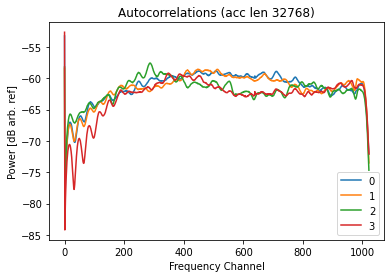

In [134]:
plot_autos(feng08)

In [110]:
for i in range(4): print(feng08.lo.get_lo_frequency_shift(i))

[0, 0.476837158203125]
[0, 0.476837158203125]
[0, 0.476837158203125]
[0, 0.476837158203125]


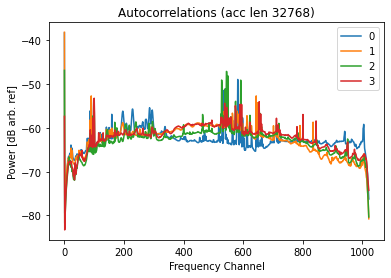

In [3]:
plot_autos(feng12)

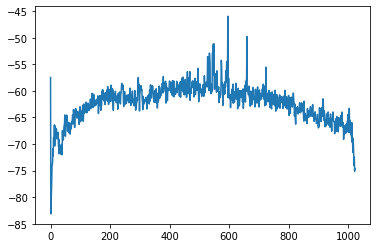

In [10]:
feng12.autocorr.set_acc_len(20)
x = feng12.autocorr.get_new_spectra()[3]
plt.plot(10*np.log10(x))

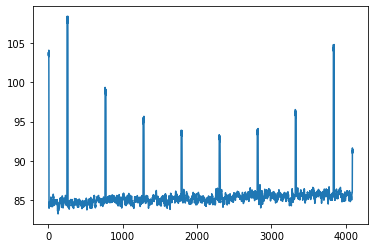

In [17]:
x = feng12.dts.get_accumulated_fft(3,128)
plt.plot(10*np.log10(x))

In [18]:
feng12.dts.is_synced()

True

In [ ]:
x = feng12.dts.

In [111]:
for i in range(4): print(feng12.lo.get_lo_frequency_shift(i))

[0, 0.476837158203125]
[0, 0.476837158203125]
[0, 0.476837158203125]
[0, 0.476837158203125]


In [112]:
fname_shifton = '/home/jackh/guppi_59808_58121_101364289611_3C147_0001.0000.raw'
fname_shiftoff = '/home/jackh/guppi_59808_58317_101364301574_3C147_0001.0000.raw'

In [78]:
for i in range(4): print(feng12.lo.get_lo_frequency_shift(i))

[32484, 0.476837158203125]
[32484, 0.476837158203125]
[32484, 0.476837158203125]
[32484, 0.476837158203125]


In [79]:
#fname_shiftoninv = '/home/jackh/guppi_59808_47911_101363666442_J0438+3004_0001.0000.raw'

In [130]:
def read_raw_2ant(fname):
    import blimpy
    gr = blimpy.GuppiRaw(fname)
    h, d = gr.read_next_data_block()
    nchan = d.shape[0] // 2
    x0 = d[0:nchan,0::2,0]
    y0 = d[0:nchan,1::2,0]
    x1 = d[nchan:,0::2,0]
    y1 = d[nchan:,1::2,0]
    return x0,y0,x1,y1

def average_pow(x,y):
    xx = x * np.conj(x)
    yy = y * np.conj(y)
    xy = x * np.conj(y)
    return xx.sum(axis=1), yy.sum(axis=1), xy.sum(axis=1)

def plot(x, y, start_chan=0, stop_chan=-1, include_xy=True):
    xx, yy, xy = average_pow(x[start_chan:stop_chan],y[start_chan:stop_chan])
    if include_xy:
        plt.subplot(2,1,1)
    plt.plot(10*np.log10(xx.real), label='xx')
    plt.plot(10*np.log10(yy.real), label='yy')
    if include_xy:
        plt.plot(10*np.log10(np.abs(xy)), label='xy')
    plt.legend()
    if include_xy:
        plt.subplot(2,1,2)
        plt.plot(np.angle(xy), label='angle(xy)')
        plt.legend()

def read_and_plot(fname, start_chan=0, stop_chan=-1, include_xy=True):
    x,y = read_raw(fname)
    plot(x,y,start_chan=start_chan, stop_chan=stop_chan, include_xy=include_xy)
    
def upchan(d, upchan_factor=128):
    nchan, ntime = d.shape
    assert ntime % upchan_factor == 0
    dr = d.reshape(nchan, ntime // upchan_factor, upchan_factor)
    DR = np.fft.fft(dr, axis=2)
    DRR = DR.transpose(0,2,1).reshape(nchan*upchan_factor, ntime//upchan_factor)
    return DRR

def plot_file(fname, start_chan=0, stop_chan=-1, upchan_factor=1):
    x0, y0, x1, y1 = read_raw_2ant(fname)
    if upchan_factor>1:
        x0 = upchan(x0[start_chan:stop_chan], upchan_factor)
        y0 = upchan(y0[start_chan:stop_chan], upchan_factor)
        x1 = upchan(x1[start_chan:stop_chan], upchan_factor)
        y1 = upchan(y1[start_chan:stop_chan], upchan_factor)
    plt.figure()
    plot(x0,y0)
    plt.figure()
    plot(x1,y1)
    plt.figure()
    plot(x0,x1)
    plt.figure()
    plot(y0,y1)
    

0
1
2
3
4
5
6
7
8
9


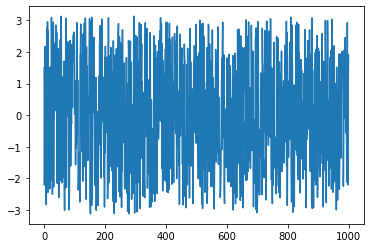

In [131]:
import blimpy
gr = blimpy.GuppiRaw(fname_shifton)
c=None
for i in range(10):    
    print(i)
    h, d = gr.read_next_data_block()
    nchan = d.shape[0] // 2
    x0 = d[0:nchan,0::2,0]
    y0 = d[0:nchan,1::2,0]
    x1 = d[nchan:,0::2,0]
    y1 = d[nchan:,1::2,0]
    x0u = upchan(x0, 128)
    x1u = upchan(x1, 128)
    if c is None:
        c = (x0u * np.conj(x1u)).sum(axis=1)
    else:
        c += (x0u * np.conj(x1u)).sum(axis=1)
plt.plot(np.angle(c)[30000:31000])


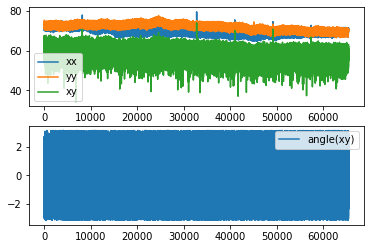

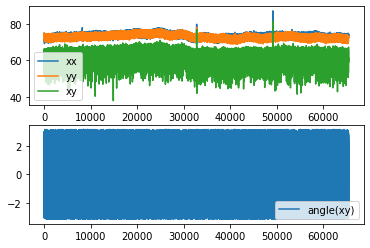

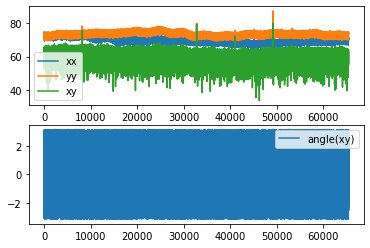

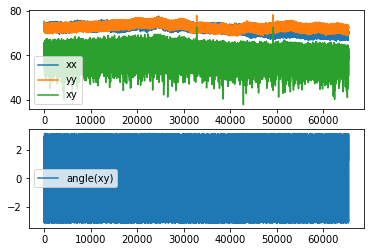

In [117]:
#plot_file(fname_shiftoff, start_chan=250, stop_chan=260, upchan_factor=128)
plot_file(fname_shiftoff, upchan_factor=128)

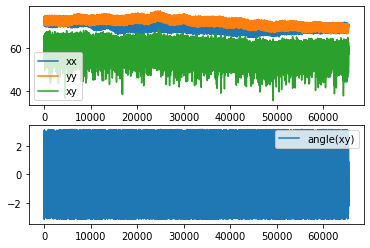

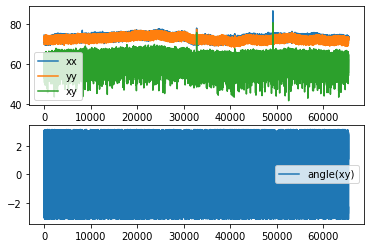

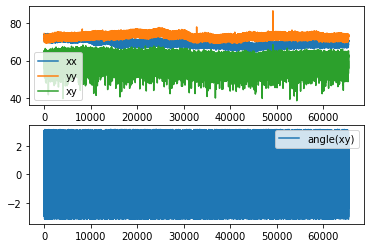

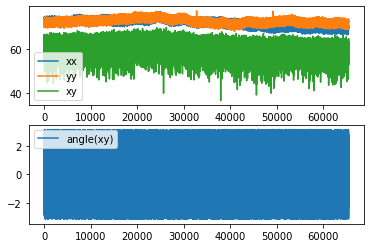

In [118]:
#plot_file(fname_shifton, start_chan=250, stop_chan=260, upchan_factor=128)
plot_file(fname_shifton, upchan_factor=128)


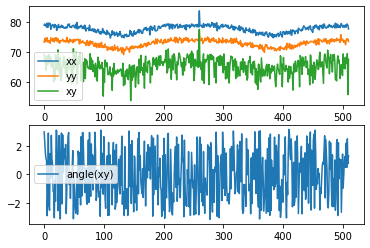

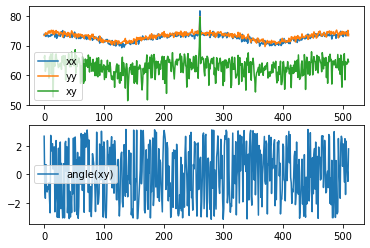

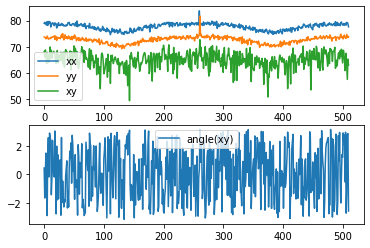

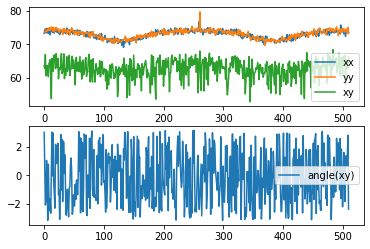

In [80]:
plot_file(fname_shiftoninv, start_chan=255, stop_chan=257, upchan_factor=256)
#plot_file(fname_shiftoninv, upchan_factor=128)


X max in channel 512
Y max in channel 512
Bin offset: 0
Freq offset: 0.0 kHz (resolution 1.95 kHz)


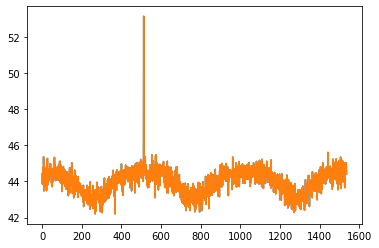

In [149]:
x, y = read_raw('/home/jackh/guppi_59808_40498_101363213989_tmc_row2_11_0001.0000.raw')
upchan_factor = 512
xup = upchan(x[511:514,:], upchan_factor)
yup = upchan(y[511:514,:], upchan_factor)
xdb = 10*np.log10(np.abs(xup).sum(axis=1))
ydb = 10*np.log10(np.abs(yup).sum(axis=1))

xmaxi = np.argmax(xdb)
ymaxi = np.argmax(ydb)
print('X max in channel %d' % xmaxi)
print('Y max in channel %d' % ymaxi)
delta_bin = xmaxi - ymaxi
rbw = 1e6 / upchan_factor # Hz
delta_f = delta_bin * rbw
print('Bin offset: %d' % delta_bin)
print('Freq offset: %.1f kHz (resolution %.2f kHz)' %(delta_f/1e3, rbw/1e3))
plt.plot(xdb)
plt.plot(ydb)

In [85]:
# Now shift X by 1 bin and take data again
feng.lo.set_lo_frequency_shift(0, 1000000)

pipeline0_lo - Setting lo phase offset of stream 0 to 2097152.0
pipeline0_lo - Setting lo phase step of stream 0 to 16777216.0


/tmp/ipykernel_1682275/812051788.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


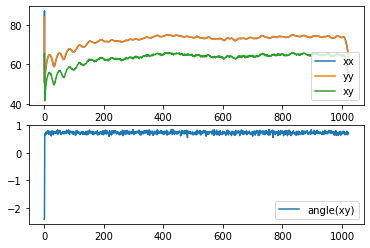

In [115]:
# Data file is guppi_59808_41405_101363269348_J0438+3004_0001.0000.raw
read_and_plot('/home/jackh/guppi_59808_41405_101363269348_J0438+3004_0001.0000.raw')

/tmp/ipykernel_1682275/812051788.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


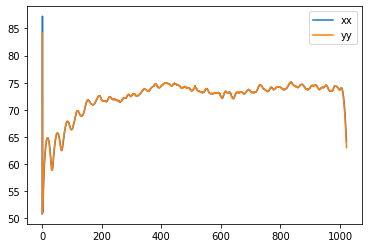

In [116]:
read_and_plot('/home/jackh/guppi_59808_41405_101363269348_J0438+3004_0001.0000.raw', include_xy=False)

/tmp/ipykernel_1682275/812051788.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


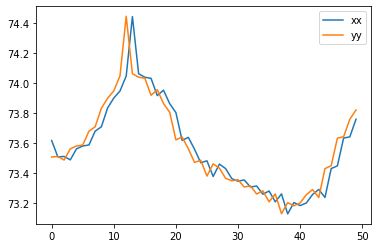

In [117]:
read_and_plot('/home/jackh/guppi_59808_41405_101363269348_J0438+3004_0001.0000.raw', include_xy=False, start_chan=500, stop_chan=550)

X max in channel 1024
Y max in channel 512
Bin offset: 512
Freq offset: 1000.0 kHz (resolution 1.95 kHz)


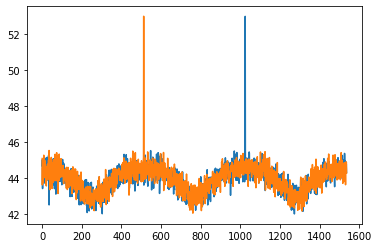

In [148]:
x, y = read_raw('/home/jackh/guppi_59808_41405_101363269348_J0438+3004_0001.0000.raw')
upchan_factor = 512
xup = upchan(x[511:514,:], upchan_factor)
yup = upchan(y[511:514,:], upchan_factor)
xdb = 10*np.log10(np.abs(xup).sum(axis=1))
ydb = 10*np.log10(np.abs(yup).sum(axis=1))

xmaxi = np.argmax(xdb)
ymaxi = np.argmax(ydb)
print('X max in channel %d' % xmaxi)
print('Y max in channel %d' % ymaxi)
delta_bin = xmaxi - ymaxi
rbw = 1e6 / upchan_factor # Hz
delta_f = delta_bin * rbw
print('Bin offset: %d' % delta_bin)
print('Freq offset: %.1f kHz (resolution %.2f kHz)' %(delta_f/1e3, rbw/1e3))
plt.plot(xdb)
plt.plot(ydb)

In [105]:
# Reconfigure FPGA (to resync and set LO shifts bback to 0)
# As cosmic, on cosmic-head: configure_remotefpga.py --config-file /home/cosmic/dev/jh/vla_f_config_a13_repeat_if.yaml


In [106]:
for i in range(4): print(feng.lo.get_lo_frequency_shift(i))

[0, 0.476837158203125]
[0, 0.476837158203125]
[0, 0.476837158203125]
[0, 0.476837158203125]


In [108]:
feng.lo.set_lo_frequency_shift(0, 100000) # 100kHz (0.1 of a bin) offset

pipeline0_lo - Setting lo phase offset of stream 0 to 209715.2
pipeline0_lo - Setting lo phase step of stream 0 to 1677721.6


/tmp/ipykernel_1682275/812051788.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


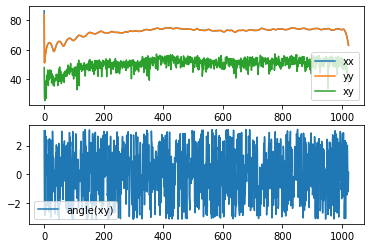

In [118]:
# Take more data. This time file is: guppi_59808_42208_101363318359_tmc_row1_6_0001.0000.raw
read_and_plot('/home/jackh/guppi_59808_42208_101363318359_tmc_row1_6_0001.0000.raw')

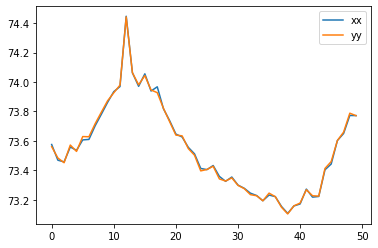

In [125]:
read_and_plot('/home/jackh/guppi_59808_42208_101363318359_tmc_row1_6_0001.0000.raw', include_xy=False, start_chan=500, stop_chan=550)

X max in channel 563
Y max in channel 512
Bin offset: 51
Freq offset: 99.6 kHz (resolution 1.95 kHz)


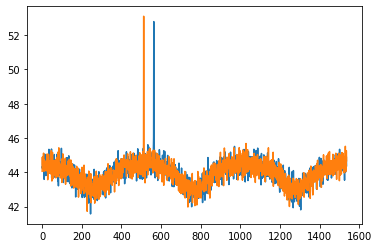

In [147]:
x, y = read_raw('/home/jackh/guppi_59808_42208_101363318359_tmc_row1_6_0001.0000.raw')
upchan_factor = 512
xup = upchan(x[511:514,:], upchan_factor)
yup = upchan(y[511:514,:], upchan_factor)
xdb = 10*np.log10(np.abs(xup).sum(axis=1))
ydb = 10*np.log10(np.abs(yup).sum(axis=1))

xmaxi = np.argmax(xdb)
ymaxi = np.argmax(ydb)
print('X max in channel %d' % xmaxi)
print('Y max in channel %d' % ymaxi)
delta_bin = xmaxi - ymaxi
rbw = 1e6 / upchan_factor # Hz
delta_f = delta_bin * rbw
print('Bin offset: %d' % delta_bin)
print('Freq offset: %.1f kHz (resolution %.2f kHz)' %(delta_f/1e3, rbw/1e3))
plt.plot(xdb)
plt.plot(ydb)